In [1]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
%matplotlib ipympl

In [2]:
n_rays = 400
wavelength = 0.0005
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)

a = 10
b = 5

size = 64
det_shape = (size, size)
pixel_size = 0.2 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

theta_x = 0
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

wo = 0.01
wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths 

x0 = 0.1
y0 = 0

coeffs = [0.0, 0, 0.0, 0.0, 0]

In [3]:
components = (
    comp.GaussBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        radius=x0,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    # comp.Lens(
    #     z= a - 2,
    #     f = 3
    # ),
    comp.AberratedLens(
        z = a,
        f = 5,
        z1 = -a,
        z2 = b,
        coeffs=coeffs,
    ),
    # comp.Lens(
    #     z= a + 1,
    #     f = 5
    # ),
    # comp.Biprism(
    #     z = a + 2,
    #     deflection = 0.1,
    # ),
    comp.AccumulatingDetector(
        z=a + b,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=10,
        interference='gauss'
    ),
)



0


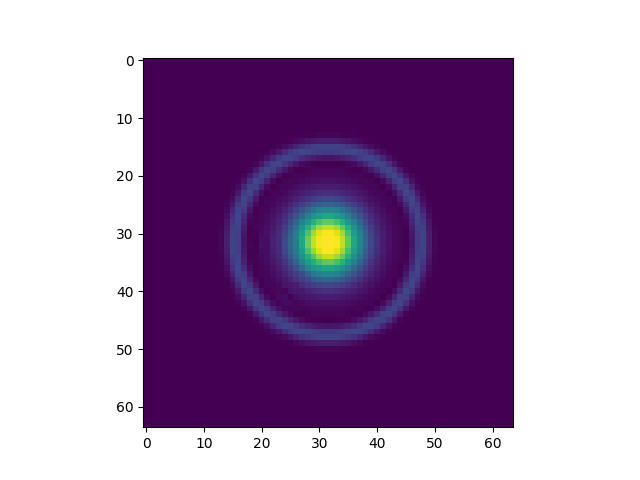

In [4]:
model = Model(components)
rays = tuple(model.run_iter(num_rays=1000, random = False))
image = model.detector.get_image(rays[-1])

plt.figure()
plt.imshow(np.abs(image))


In [5]:
AppWindow = QApplication(sys.argv)
viewer = TemGymWindow(model)
viewer.show()
AppWindow.exec()


1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0


ValueError: dx is too large for parabasal representation: [-4.18538158e-01 -5.86008974e-01 -4.18545963e-01  8.99999605e+01
  8.99998523e+01 -2.09271871e-01 -3.76710201e-01 -2.09292672e-01
  8.99999548e+01  8.99998788e+01  2.09271871e-01  4.18533821e-02
  2.09292672e-01  8.99999382e+01  8.99998788e+01  4.18538158e-01
  2.51107022e-01  4.18545963e-01  8.99999256e+01  8.99998523e+01
  2.09271871e-01  4.18533821e-02  2.09258875e-01  8.99999382e+01
  8.99997926e+01 -2.09271871e-01 -3.76710201e-01 -2.09258875e-01
  8.99999548e+01  8.99997926e+01 -7.07712596e-01 -8.75311520e-01
 -7.07655274e-01  8.99999672e+01  8.99998245e+01 -8.37324309e-01
 -1.00496374e+00 -8.37339918e-01  8.99999694e+01  8.99998776e+01
 -7.41425254e-01 -9.09034159e-01 -7.41503313e-01  8.99999678e+01
  8.99998974e+01 -4.75677357e-01 -6.43218163e-01 -4.75759216e-01
  8.99999625e+01  8.99999056e+01 -1.00935374e-01 -2.68421336e-01
 -1.00955939e-01  8.99999523e+01  8.99999081e+01  2.96937773e-01
  1.29457281e-01  2.96995077e-01  8.99999354e+01  8.99999073e+01
  6.26765865e-01  4.59248711e-01  6.26855040e-01  8.99999118e+01
  8.99999025e+01  8.12996501e-01  6.45442151e-01  8.13047929e-01
  8.99998909e+01  8.99998895e+01  8.12996501e-01  6.45442151e-01
  8.12975386e-01  8.99998909e+01  8.99998601e+01  6.26765865e-01
  4.59248711e-01  6.26700066e-01  8.99999118e+01  8.99997998e+01
  2.96937773e-01  1.29457281e-01  2.96891546e-01  8.99999354e+01
  8.99997039e+01 -1.00935374e-01 -2.68421336e-01 -1.00918574e-01
  8.99999523e+01  8.99996679e+01 -4.75677357e-01 -6.43218163e-01
 -4.75613241e-01  8.99999625e+01  8.99997541e+01 -1.01100685e+00
 -1.17880693e+00 -1.01085784e+00  8.99999726e+01  8.99998329e+01
 -1.19853085e+00 -1.36641081e+00 -1.19845250e+00  8.99999749e+01
  8.99998819e+01 -1.25660633e+00 -1.42451347e+00 -1.25662975e+00
  8.99999756e+01  8.99999048e+01 -1.18854003e+00 -1.35641543e+00
 -1.18867005e+00  8.99999748e+01  8.99999176e+01 -9.91698945e-01
 -1.15949149e+00 -9.91887706e-01  8.99999723e+01  8.99999237e+01
 -6.87375760e-01 -8.55066325e-01 -6.87549459e-01  8.99999677e+01
  8.99999261e+01 -3.08525106e-01 -4.76133061e-01 -3.08614484e-01
  8.99999598e+01  8.99999267e+01  1.03786256e-01 -6.37877003e-02
  1.03817112e-01  8.99999470e+01  8.99999268e+01  5.04840899e-01
  3.37244096e-01  5.04979573e-01  8.99999265e+01  8.99999265e+01
  8.51150180e-01  6.83489285e-01  8.51341113e-01  8.99998950e+01
  8.99999252e+01  1.10519242e+00  9.37458374e-01  1.10536006e+00
  8.99998529e+01  8.99999213e+01  1.23947324e+00  1.07169159e+00
  1.23955336e+00  8.99998166e+01  8.99999123e+01  1.23947324e+00
  1.07169159e+00  1.23943932e+00  8.99998166e+01  8.99998942e+01
  1.10519242e+00  9.37458374e-01  1.10506599e+00  8.99998529e+01
  8.99998580e+01  8.51150180e-01  6.83489285e-01  8.50990991e-01
  8.99998950e+01  8.99997833e+01  5.04840899e-01  3.37244096e-01
  5.04721060e-01  8.99999265e+01  8.99996315e+01  1.03786256e-01
 -6.37877003e-02  1.03759274e-01  8.99999470e+01  8.99994447e+01
 -3.08525106e-01 -4.76133061e-01 -3.08447241e-01  8.99999598e+01
  8.99995265e+01 -6.87375760e-01 -8.55066325e-01 -6.87227703e-01
  8.99999677e+01  8.99997196e+01 -1.23744747e+00 -1.40548168e+00
 -1.23715944e+00  8.99999760e+01  8.99998375e+01 -1.47989260e+00
 -1.64805094e+00 -1.47966103e+00  8.99999784e+01  8.99998882e+01
 -1.62935652e+00 -1.79760139e+00 -1.62924373e+00  8.99999797e+01
  8.99999140e+01 -1.67663189e+00 -1.84490572e+00 -1.67666311e+00
  8.99999801e+01  8.99999274e+01 -1.62398608e+00 -1.79222771e+00
 -1.62416675e+00  8.99999797e+01  8.99999352e+01 -1.46934105e+00
 -1.63749357e+00 -1.46963210e+00  8.99999783e+01  8.99999392e+01
 -1.22237554e+00 -1.39040269e+00 -1.22271006e+00  8.99999759e+01
  8.99999407e+01 -8.98567136e-01 -1.06646150e+00 -8.98866574e-01
  8.99999719e+01  8.99999409e+01 -5.18241552e-01 -6.86025738e-01
 -5.18434883e-01  8.99999658e+01  8.99999406e+01 -1.05306529e-01
 -2.73027119e-01 -1.05347660e-01  8.99999564e+01  8.99999403e+01
  3.14256043e-01  1.46540310e-01  3.14376939e-01  8.99999416e+01
  8.99999404e+01  7.14042006e-01  5.46274853e-01  7.14296067e-01
  8.99999179e+01  8.99999408e+01  1.06890652e+00  9.01047909e-01
  1.06923330e+00  8.99998791e+01  8.99999410e+01  1.35655746e+00
  1.18859310e+00  1.35687977e+00  8.99998158e+01  8.99999402e+01
  1.55895320e+00  1.39089748e+00  1.55919600e+00  8.99997226e+01
  8.99999376e+01  1.66341861e+00  1.49531024e+00  1.66352723e+00
  8.99996324e+01  8.99999319e+01  1.66341861e+00  1.49531024e+00
  1.66337194e+00  8.99996324e+01  8.99999213e+01  1.55895320e+00
  1.39089748e+00  1.55876849e+00  8.99997226e+01  8.99999018e+01
  1.35655746e+00  1.18859310e+00  1.35628572e+00  8.99998158e+01
  8.99998647e+01  1.06890652e+00  9.01047909e-01  1.06861961e+00
  8.99998791e+01  8.99997877e+01  7.14042006e-01  5.46274853e-01
  7.13814593e-01  8.99999179e+01  8.99996041e+01  3.14256043e-01
  1.46540310e-01  3.14146879e-01  8.99999416e+01  8.99991563e+01
 -1.05306529e-01 -2.73027119e-01 -1.05269330e-01  8.99999564e+01
  8.99988958e+01 -5.18241552e-01 -6.86025738e-01 -5.18067565e-01
  8.99999658e+01  8.99994230e+01 -8.98567136e-01 -1.06646150e+00
 -8.98301223e-01  8.99999719e+01  8.99997168e+01]

7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5


C:\Users\dl277493\Documents\Code\TemGym\TemGym\src\temgymbasic\gbd.py:105: RuntimeWarning: overflow encountered in exp
  return np.exp(1j * k * transversal)
C:\Users\dl277493\Documents\Code\TemGym\TemGym\src\temgymbasic\gbd.py:154: RuntimeWarning: overflow encountered in multiply
  return np.sum(np.abs(amplitude) * aligned * opl * misaligned_phase * guoy, axis = -1)
C:\Users\dl277493\Documents\Code\TemGym\TemGym\src\temgymbasic\gbd.py:154: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.abs(amplitude) * aligned * opl * misaligned_phase * guoy, axis = -1)


6
7
8
9
0
1
2
3
4
5
6
7
8


0

In [6]:
# model = Model(components)
# rays = tuple(model.run_iter(num_rays=5000))
# image = model.detector.get_image(rays)
# det_x = np.linspace(-det_shape[1]//2*pixel_size, det_shape[1]//2*pixel_size, det_shape[1])

# plt.figure()
# plt.imshow(image)